**Описание задания:**

В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов. Данные для обучения моделей необходимо загрузить самостоятельно с сайта. Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. (Подробнее о признаках можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.)

**Этапы работы:**

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

2. Подготовьте датасет к обучению моделей.

a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

4. Обучите дерево решений на обучающем множестве. Используйте следующие модели:

a) tree.DecisionTreeClassifier

b) ensemble.RandomForestClassifier

5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.

6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.

7. Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.

a) Повторите п. 5

8. Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.

a) Повторите п. 5

9. Сформулируйте выводы по проделанной работе.

a) Сравните метрики построенных моделей.

b) Напишите свое мнение, какая модель наилучшая и почему.


# Library

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Load data

In [7]:
df = pd.read_csv('heart.csv')
df.head(1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Preprocessing

In [9]:
category_columns = df.loc[:, df.dtypes == 'object'].columns
list(category_columns)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [10]:
df['Sex'].nunique(), df['ChestPainType'].nunique(), df['RestingECG'].nunique(), df['ExerciseAngina'].nunique(), df['ST_Slope'].nunique(), 

(2, 4, 3, 2, 3)

In [11]:
df_ohe = pd.get_dummies(df, columns=list(category_columns))
df_ohe.shape

(918, 21)

In [12]:
X = df_ohe.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling 1

In [13]:
df['HeartDisease'].unique()

array([0, 1])

In [14]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [15]:
print(classification_report(y_test, dtc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.82      0.76        77
           1       0.85      0.77      0.81       107

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.80      0.79      0.79       184



In [16]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [17]:
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        77
           1       0.92      0.87      0.89       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



# feature_importances_

In [18]:
f_imp = pd.DataFrame(np.c_[rfc.feature_names_in_, rfc.feature_importances_], 
                     columns=['name', 'importance'],
                     )
f_imp

,name,importance
0,Age,0.081428
1,RestingBP,0.063844
2,Cholesterol,0.095472
3,FastingBS,0.018772
4,MaxHR,0.088065
5,Oldpeak,0.100494
6,Sex_F,0.021447
7,Sex_M,0.023688
8,ChestPainType_ASY,0.057715
9,ChestPainType_ATA,0.015617


Объединим разделенные ohe признаки

In [19]:
ST_Slope = f_imp.iloc[17:]['importance'].sum()
ExerciseAngina = f_imp.iloc[15:17]['importance'].sum()
RestingECG = f_imp.iloc[12:15]['importance'].sum()
ChestPainType = f_imp.iloc[8:12]['importance'].sum()
Sex = f_imp.iloc[6:8]['importance'].sum()

In [20]:
f_imp = f_imp.iloc[:6]
f_imp = f_imp.append({'importance': ST_Slope, 'name': 'ST_Slope'}, ignore_index=True)
f_imp = f_imp.append({'importance': ExerciseAngina, 'name': 'ExerciseAngina'}, ignore_index=True)
f_imp = f_imp.append({'importance': RestingECG, 'name': 'RestingECG'}, ignore_index=True)
f_imp = f_imp.append({'importance': ChestPainType, 'name': 'ChestPainType'}, ignore_index=True)
f_imp = f_imp.append({'importance': Sex, 'name': 'Sex'}, ignore_index=True)
f_imp = f_imp.sort_values('importance', ascending=False)

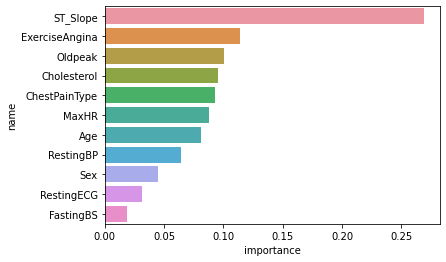

In [21]:
sns.barplot(y=f_imp['name'], x=f_imp['importance'],)

# Modeling 2

In [29]:
bgc = BaggingClassifier(base_estimator=DecisionTreeClassifier(), 
                        random_state=0).fit(X_train, y_train)

In [30]:
print(classification_report(y_test, bgc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        77
           1       0.92      0.80      0.86       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



# Modeling 3

In [31]:
estimators = [
    ('dtc', DecisionTreeClassifier(random_state=0)),
    ('rfc', RandomForestClassifier(random_state=0)),
    ('lsvc_ss', make_pipeline(StandardScaler(), LinearSVC(random_state=0))),
    ]
    
stackc = StackingClassifier(estimators=estimators).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

In [32]:
print(classification_report(y_test, stackc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        77
           1       0.90      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



# Resume

У всех ансамблей метрики сравнительно схожи и мало отличаются, чего не скажешь про алгоритм решающего дерева, который показал худший результат